In [ ]:
import pandas as pd
d=pd.read_csv("/content/mbti_1 (1).csv",error_bad_lines=False,engine='python')
df=pd.DataFrame(d)
df.head(10)

<ipython-input-184-a034dcc5f510>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  d=pd.read_csv("/content/mbti_1 (1).csv",error_bad_lines=False,engine='python')


,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


In [ ]:
df.shape

(8675, 2)

In [ ]:
import re
import wordcloud
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
import time
#%load_ext nb_black

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
from sklearn.model_selection import train_test_split
import os
personality_data, df_holdout = train_test_split(df, random_state=45,stratify=df["type"])
personality_data.to_csv(os.path.join('personality_data.csv'),index=False)
df_holdout.to_csv(os.path.join('df_holdout.csv'),index=False)
print(personality_data['type'].value_counts())
print(df_holdout['type'].value_counts())

INFP    1374
INFJ    1102
INTP     978
INTJ     818
ENTP     514
ENFP     506
ISTP     253
ISFP     203
ENTJ     173
ISTJ     154
ENFJ     142
ISFJ     125
ESTP      67
ESFP      36
ESFJ      32
ESTJ      29
Name: type, dtype: int64
INFP    458
INFJ    368
INTP    326
INTJ    273
ENTP    171
ENFP    169
ISTP     84
ISFP     68
ENTJ     58
ISTJ     51
ENFJ     48
ISFJ     41
ESTP     22
ESFP     12
ESTJ     10
ESFJ     10
Name: type, dtype: int64


In [ ]:
df.shape

(8675, 2)

In [ ]:
personality_data = pd.read_csv(os.path.join("personality_data.csv"))


In [ ]:
personality_data.shape

(6506, 2)

In [ ]:
personality_data.head()

,type,posts
0,INTP,'The main reasons why I visit someone's profil...
1,ISTJ,"'After reading the op, first Hot For Teacher b..."
2,INFJ,I got used to not caring about what other peop...
3,INFP,Something interesting I discovered when I was ...
4,ENTP,"'Eh, I got INFJ and I'm an ENTP. Needs work, b..."


In [ ]:
personality_data['type'].value_counts()

INFP    1374
INFJ    1102
INTP     978
INTJ     818
ENTP     514
ENFP     506
ISTP     253
ISFP     203
ENTJ     173
ISTJ     154
ENFJ     142
ISFJ     125
ESTP      67
ESFP      36
ESFJ      32
ESTJ      29
Name: type, dtype: int64

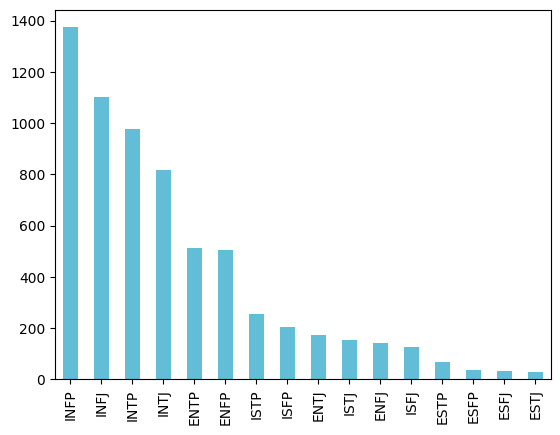

In [ ]:
import matplotlib.pyplot as plt
personality_data['type'].value_counts().plot(kind='bar',color='#61BED6')
plt.show()

In [ ]:
personality_data['is_extrovert']=personality_data['type'].apply(lambda x:1 if x[0]== 'E' else 0)
personality_data['is_sensing']=personality_data['type'].apply(lambda x:1 if x[1]=='S' else 0)
personality_data['is_thinking']=personality_data['type'].apply(lambda x:1 if x[2]=='T' else 0)
personality_data['is_judging']=personality_data['type'].apply(lambda x:1 if x[3]=='J' else 0)
personality_data = personality_data[
    ["type", "is_extrovert", "is_sensing", "is_thinking", "is_judging", "posts"]
]
personality_data

,type,is_extrovert,is_sensing,is_thinking,is_judging,posts
0,INTP,0,0,1,0,'The main reasons why I visit someone's profil...
1,ISTJ,0,1,1,1,"'After reading the op, first Hot For Teacher b..."
2,INFJ,0,0,0,1,I got used to not caring about what other peop...
3,INFP,0,0,0,0,Something interesting I discovered when I was ...
4,ENTP,1,0,1,0,"'Eh, I got INFJ and I'm an ENTP. Needs work, b..."
...,...,...,...,...,...,...
6501,ENTP,1,0,1,0,'Good question: I am not an engineer at my wor...
6502,INFP,0,0,0,0,'I prefer hikes and walks... but I do HIIT(Hig...
6503,ISTP,0,1,1,0,'cmon people! Let's not let this thread die! :...
6504,INTJ,0,0,1,1,'I only recently started getting back into per...


In [ ]:
introvert_count = personality_data["is_extrovert"].value_counts()[0]
extrovert_count = personality_data["is_extrovert"].value_counts()[1]

intuition_count = personality_data["is_sensing"].value_counts()[0]
sensing_count = personality_data["is_sensing"].value_counts()[1]

feeling_count = personality_data["is_thinking"].value_counts()[0]
thinking_count = personality_data["is_thinking"].value_counts()[1]

perceiving_count = personality_data["is_judging"].value_counts()[0]
judging_count = personality_data["is_judging"].value_counts()[1]

In [ ]:
print(f"Introvert Count: {introvert_count}")
print(f"Extrovert Count: {extrovert_count}")
print(f"Intuition Count: {intuition_count}")
print(f"Sensing Count: {sensing_count}")
print(f"Feeling Count: {feeling_count}")
print(f"Thinking Count: {thinking_count}")
print(f"Perceiving Count: {perceiving_count}")
print(f"Judging Count: {judging_count}")

Introvert Count: 5007
Extrovert Count: 1499
Intuition Count: 5607
Sensing Count: 899
Feeling Count: 3520
Thinking Count: 2986
Perceiving Count: 3931
Judging Count: 2575


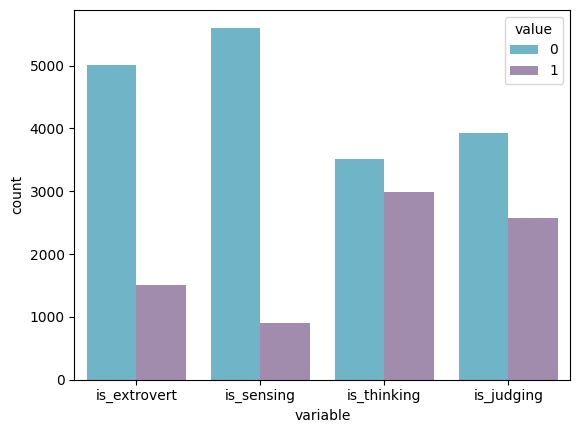

In [ ]:
import seaborn as sns
sns.countplot(
    x="variable",
    hue="value",
    data=pd.melt(
        personality_data[["is_extrovert", "is_sensing", "is_thinking", "is_judging"]]
    ),
    palette=["#61BED6", "#A386B4"],
)

plt.show()

In [ ]:

corr = personality_data[
    ["is_extrovert", "is_sensing", "is_thinking", "is_judging"]
].corr()
corr.style.background_gradient(cmap="Blues").set_precision(4)

<ipython-input-30-63f275aa07cf>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap="Blues").set_precision(4)


,is_extrovert,is_sensing,is_thinking,is_judging
is_extrovert,1.0000,-0.0456,0.0696,-0.1622
is_sensing,-0.0456,1.0000,0.0808,-0.0144
is_thinking,0.0696,0.0808,1.0000,-0.0049
is_judging,-0.1622,-0.0144,-0.0049,1.0000


data cleaning


In [ ]:
personality_data["clean_posts"] = personality_data["posts"].str.lower()

# replacing ||| with space
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\|\|\|"), " "
)

personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*"), ""
)

# dropping emails
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\S+@\S+"), ""
)

# dropping punctuations
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"[^a-z\s]"), " "
)

# dropping MBTIs mentioned in the posts. There are quite a few mention of these types in these posts.
mbti = personality_data["type"].unique()
for type_word in mbti:
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        type_word.lower(), ""
    )

In [ ]:
personality_data.head()

,type,is_extrovert,is_sensing,is_thinking,is_judging,posts,clean_posts
0,INTP,0,0,1,0,'The main reasons why I visit someone's profil...,the main reasons why i visit someone s profil...
1,ISTJ,0,1,1,1,"'After reading the op, first Hot For Teacher b...",after reading the op first hot for teacher b...
2,INFJ,0,0,0,1,I got used to not caring about what other peop...,i got used to not caring about what other peop...
3,INFP,0,0,0,0,Something interesting I discovered when I was ...,something interesting i discovered when i was ...
4,ENTP,1,0,1,0,"'Eh, I got INFJ and I'm an ENTP. Needs work, b...",eh i got and i m an needs work but i can...


Lemmitizing

In [ ]:
nltk.download('wordnet')
from nltk.corpus import stopwords
t=time.time()
lemmatizer= WordNetLemmatizer()
personality_data['clean_posts']=personality_data['clean_posts'].apply(lambda x: ' '.join([
    lemmatizer.lemmatize(word) for word in x.split(' ')
    if word not in stopwords.words('english')
    ]))
print(f"Lemmitizing Time: {time.time() - t} seconds")


[nltk_data] Downloading package wordnet to /root/nltk_data...


Lemmitizing Time: 1365.7902097702026 seconds


In [ ]:
personality_data.shape

(6506, 7)

In [ ]:
personality_data.to_csv(os.path.join("..", "content", "clean_data_1.csv"), index=False)

sentiment analysis

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
import time

In [ ]:
personality_data=pd.read_csv(os.path.join('..','content','clean_data_1.csv'))

In [ ]:
personality_data.head()

,type,is_extrovert,is_sensing,is_thinking,is_judging,posts,clean_posts
0,INTP,0,0,1,0,'The main reasons why I visit someone's profil...,main reason visit someone profile misclic...
1,ISTJ,0,1,1,1,"'After reading the op, first Hot For Teacher b...",reading op first hot teacher van halen poppe...
2,INFJ,0,0,0,1,I got used to not caring about what other peop...,got used caring people think friend long time ...
3,INFP,0,0,0,0,Something interesting I discovered when I was ...,something interesting discovered transitioning...
4,ENTP,1,0,1,0,"'Eh, I got INFJ and I'm an ENTP. Needs work, b...",eh got need work see would said lol thi...


In [ ]:
#checking for null values
personality_data.isnull().sum()

type            0
is_extrovert    0
is_sensing      0
is_thinking     0
is_judging      0
posts           0
clean_posts     0
dtype: int64

In [ ]:
t=time.time()
analyzer=SentimentIntensityAnalyzer()
nlp_sentiment_score=[]

for post in personality_data['clean_posts']:
  score=analyzer.polarity_scores(post)
  nlp_sentiment_score.append(score)
print(f'sentiment scoring time: {time.time() - t:.2f} seconds')

sentiment scoring time: 345.96 seconds


In [ ]:
personality_data['compound_sentiment']=[score['compound'] for score in nlp_sentiment_score]
personality_data['pos_sentiment']=[score['pos'] for score in nlp_sentiment_score]
personality_data["neg_sentiment"] = [score["neg"] for score in nlp_sentiment_score]
personality_data["neu_sentiment"] = [score["neu"] for score in nlp_sentiment_score]



In [ ]:
min_max_scaler = MinMaxScaler()
personality_data["compound_sentiment"] = min_max_scaler.fit_transform(
    np.array(personality_data["compound_sentiment"]).reshape(-1, 1)
)
personality_data["pos_sentiment"] = min_max_scaler.fit_transform(
    np.array(personality_data["pos_sentiment"]).reshape(-1, 1)
)
personality_data["neg_sentiment"] = min_max_scaler.fit_transform(
    np.array(personality_data["neg_sentiment"]).reshape(-1, 1)
)
personality_data["neu_sentiment"] = min_max_scaler.fit_transform(
    np.array(personality_data["neu_sentiment"]).reshape(-1, 1)
)

In [ ]:
personality_data.isnull().sum()

type                  0
is_extrovert          0
is_sensing            0
is_thinking           0
is_judging            0
posts                 0
clean_posts           0
compound_sentiment    0
pos_sentiment         0
neg_sentiment         0
neu_sentiment         0
dtype: int64

In [ ]:
personality_data['tag_posts']=personality_data['posts'].str.replace(re.compile(r'https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*'),
                                                                    lambda match: match.group(2),)
personality_data['tag_posts']=[post for post in personality_data['tag_posts'].str.split('\/\/\/')]


In [ ]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
t=time.time()
personality_data['tagged_words']=personality_data['tag_posts'].apply(lambda x: [nltk.pos_tag(word_tokenize(line)) for line in x])
print(f'POS tagging time:{time.time()-t} seconds')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


POS tagging time:528.300990819931 seconds


In [ ]:

tag_set=set()
for i, data in personality_data['tagged_words'].iteritems():
  for tup in data[0]:
    tag_set.add(tup[1])
tag_list=list(tag_set)


<ipython-input-215-992e966e5204>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, data in personality_data['tagged_words'].iteritems():


In [ ]:
t=time.time()
def pos_cat(x,tag):
  return [len([y for y in line if y[1]==tag]) for line in x]
for col in tag_list:
  personality_data['POS_'+ col+ '_mean']=personality_data['tagged_words'].apply(lambda x: np.mean(pos_cat(x,col)))
  personality_data['POS_' + col + '_std']=personality_data['tagged_words'].apply(lambda x: np.std(pos_cat(x,col)))
print(f'POS stas time: {time.time()-t} seconds')



POS stas time: 100.23543977737427 seconds


In [ ]:
tags_dict = {
    "ADJ": ["JJ", "JJR", "JJS"],
    "ADP": ["EX", "TO"],
    "ADV": ["RB", "RBR", "RBS", "WRB"],
    "CONJ": ["CC", "IN"],
    "DET": ["DT", "PDT", "WDT"],
    "NOUN": ["NN", "NNS", "NNP", "NNPS"],
    "NUM": ["CD"],
    "PRT": ["RP"],
    "PRON": ["PRP", "PRP$", "WP", "WP$"],
    "VERB": ["MD", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"],
    ".": ["#", "$", "''", "(", ")", ",", ".", ":"],
    "X": ["FW", "LS", "UH"],
}

In [ ]:
t = time.time()


def stanford_tag(x, tag):
    tags_list = [len([y for y in line if y[1] in tags_dict[col]]) for line in x]
    return tags_list
#newframe=frame.copy()

for col in tags_dict.keys():
    personality_data[col + "_avg"] = personality_data["tagged_words"].apply(
        lambda x: np.median(stanford_tag(x, col))
    )

print(f"Stanford POS Stats Time: {time.time() - t} seconds")

<ipython-input-218-3f0b59bc5d0c>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  personality_data[col + "_avg"] = personality_data["tagged_words"].apply(
<ipython-input-218-3f0b59bc5d0c>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  personality_data[col + "_avg"] = personality_data["tagged_words"].apply(
<ipython-input-218-3f0b59bc5d0c>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once u

Stanford POS Stats Time: 51.81712245941162 seconds


<ipython-input-218-3f0b59bc5d0c>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  personality_data[col + "_avg"] = personality_data["tagged_words"].apply(


In [ ]:
personality_data.head()

,type,is_extrovert,is_sensing,is_thinking,is_judging,posts,clean_posts,compound_sentiment,pos_sentiment,neg_sentiment,...,ADV_avg,CONJ_avg,DET_avg,NOUN_avg,NUM_avg,PRT_avg,PRON_avg,VERB_avg,._avg,X_avg
0,INTP,0,0,1,0,'The main reasons why I visit someone's profil...,main reason visit someone profile misclic...,0.998449,0.315930,0.234742,...,151.0,214.0,142.0,285.0,15.0,7.0,145.0,352.0,228.0,3.0
1,ISTJ,0,1,1,1,"'After reading the op, first Hot For Teacher b...",reading op first hot teacher van halen poppe...,0.998849,0.348059,0.205008,...,77.0,140.0,75.0,312.0,17.0,3.0,114.0,193.0,120.0,1.0
2,INFJ,0,0,0,1,I got used to not caring about what other peop...,got used caring people think friend long time ...,0.999900,0.497992,0.143975,...,150.0,204.0,114.0,310.0,15.0,6.0,204.0,325.0,252.0,8.0
3,INFP,0,0,0,0,Something interesting I discovered when I was ...,something interesting discovered transitioning...,0.999650,0.338688,0.057903,...,130.0,196.0,124.0,361.0,24.0,7.0,180.0,298.0,254.0,0.0
4,ENTP,1,0,1,0,"'Eh, I got INFJ and I'm an ENTP. Needs work, b...",eh got need work see would said lol thi...,0.999600,0.409639,0.178404,...,115.0,180.0,90.0,266.0,19.0,12.0,192.0,292.0,212.0,3.0


In [ ]:
personality_data.to_csv(os.path.join('..','content','clean_data_2.csv'),index=False)

counting and vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
personality_data=pd.read_csv(os.path.join('..','content','clean_data_2.csv'))

In [ ]:
personality_data.head()

,type,is_extrovert,is_sensing,is_thinking,is_judging,posts,clean_posts,compound_sentiment,pos_sentiment,neg_sentiment,...,ADV_avg,CONJ_avg,DET_avg,NOUN_avg,NUM_avg,PRT_avg,PRON_avg,VERB_avg,._avg,X_avg
0,INTP,0,0,1,0,'The main reasons why I visit someone's profil...,main reason visit someone profile misclic...,0.998449,0.315930,0.234742,...,151.0,214.0,142.0,285.0,15.0,7.0,145.0,352.0,228.0,3.0
1,ISTJ,0,1,1,1,"'After reading the op, first Hot For Teacher b...",reading op first hot teacher van halen poppe...,0.998849,0.348059,0.205008,...,77.0,140.0,75.0,312.0,17.0,3.0,114.0,193.0,120.0,1.0
2,INFJ,0,0,0,1,I got used to not caring about what other peop...,got used caring people think friend long time ...,0.999900,0.497992,0.143975,...,150.0,204.0,114.0,310.0,15.0,6.0,204.0,325.0,252.0,8.0
3,INFP,0,0,0,0,Something interesting I discovered when I was ...,something interesting discovered transitioning...,0.999650,0.338688,0.057903,...,130.0,196.0,124.0,361.0,24.0,7.0,180.0,298.0,254.0,0.0
4,ENTP,1,0,1,0,"'Eh, I got INFJ and I'm an ENTP. Needs work, b...",eh got need work see would said lol thi...,0.999600,0.409639,0.178404,...,115.0,180.0,90.0,266.0,19.0,12.0,192.0,292.0,212.0,3.0


In [ ]:
personality_data.shape


(6506, 115)

In [ ]:
personality_data.shape

(6506, 115)

In [ ]:
#question/ exclamation/colon/emoji count
def unique_words(s):
  unique=set(s.split(' '))
  return len(unique)/50

def emojis(post):
  emoji_count=0
  words=post.split()
  for e in words:
    if "http" not in e:
      if(e.count(':'))==2:
        emoji_count +=1
  return emoji_count / 50
def colons(post):
  colon_count=0
  words=post.split()
  for e in words:
        if "http" not in e:
            colon_count += e.count(":")
  return colon_count / 50

In [ ]:
personality_data["qm"] = personality_data["posts"].apply(lambda s: s.count("?") / 50)
personality_data["em"] = personality_data["posts"].apply(lambda s: s.count("!") / 50)
personality_data["colons"] = personality_data["posts"].apply(colons)
personality_data["emojis"] = personality_data["posts"].apply(emojis)

word count

In [ ]:
personality_data["word_count"] = personality_data["posts"].apply(
    lambda s: (s.count(" ") + 1) / 50
)
personality_data["unique_words"] = personality_data["posts"].apply(unique_words)

In [ ]:
t=time.time()
personality_data['post_length_var']=personality_data['posts'].apply(lambda x: np.var([len(post.split()) for post in x.split('|||')]))
print(f'time taken: {time.time()-t}')

time taken: 1.09147310256958


link count

In [ ]:
personality_data['link_count']=personality_data['posts'].apply(lambda s: s.count('http')/50)

upper case count

In [ ]:
personality_data['upper']=personality_data['posts'].apply(lambda x: len([x for x in x.split() if x.isupper()])/50)

ellipses count

In [ ]:
ellipses_count = [
    len(re.findall(r"\.\.\.\ ", posts)) / 50 for posts in personality_data["posts"]
]
personality_data["ellipses"] = ellipses_count

Image count


In [ ]:
personality_data['img_count']=[len(re.findall(r'(\.jpg) | (\.jpeg) | (\.gif)| (\.png)',post))/50
                               for post in personality_data['posts']]

In [ ]:
personality_data.head()

,type,is_extrovert,is_sensing,is_thinking,is_judging,posts,clean_posts,compound_sentiment,pos_sentiment,neg_sentiment,...,em,colons,emojis,word_count,unique_words,post_length_var,link_count,upper,ellipses,img_count
0,INTP,0,0,1,0,'The main reasons why I visit someone's profil...,main reason visit someone profile misclic...,0.998449,0.315930,0.234742,...,0.00,0.16,0.00,29.06,15.24,92.608400,0.06,1.14,0.02,0.00
1,ISTJ,0,1,1,1,"'After reading the op, first Hot For Teacher b...",reading op first hot teacher van halen poppe...,0.998849,0.348059,0.205008,...,0.02,0.12,0.00,20.00,11.18,169.520818,0.08,1.24,0.04,0.00
2,INFJ,0,0,0,1,I got used to not caring about what other peop...,got used caring people think friend long time ...,0.999900,0.497992,0.143975,...,0.70,0.32,0.12,29.04,14.14,121.891600,0.04,1.68,0.26,0.00
3,INFP,0,0,0,0,Something interesting I discovered when I was ...,something interesting discovered transitioning...,0.999650,0.338688,0.057903,...,0.04,0.50,0.00,28.30,13.98,124.731600,0.04,1.98,0.06,0.00
4,ENTP,1,0,1,0,"'Eh, I got INFJ and I'm an ENTP. Needs work, b...",eh got need work see would said lol thi...,0.999600,0.409639,0.178404,...,0.34,0.40,0.00,24.70,12.56,198.073600,0.06,2.20,0.00,0.04


In [ ]:
personality_data.dtypes

type                object
is_extrovert         int64
is_sensing           int64
is_thinking          int64
is_judging           int64
                    ...   
post_length_var    float64
link_count         float64
upper              float64
ellipses           float64
img_count          float64
Length: 126, dtype: object

In [ ]:
personality_data.isnull().sum()

type               0
is_extrovert       0
is_sensing         0
is_thinking        0
is_judging         0
                  ..
post_length_var    0
link_count         0
upper              0
ellipses           0
img_count          0
Length: 126, dtype: int64

In [ ]:
personality_data.to_csv(os.path.join('..','content','clean_data_3.csv'),index=False)

Vectorization

In [ ]:
tfidf_vectorizer = TfidfVectorizer(min_df=25, max_df=0.8)
tfidf_words = tfidf_vectorizer.fit_transform(personality_data["clean_posts"])
tfidf_vectorized_data = pd.DataFrame(
    data=tfidf_words.toarray(), columns=tfidf_vectorizer.get_feature_names_out()
)

In [ ]:
tfidf_vectorized_data.head()

,ab,abandon,abandoned,abhor,ability,able,abnormal,aboard,abortion,abrasive,...,zelda,zen,zero,zodiac,zombie,zone,zoned,zoning,zoo,zoom
0,0.0,0.0,0.0,0.000000,0.0,0.046234,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.064474,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.028942,0.0,0.0,0.0,0.083211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
tfidf_vectorized_data.to_csv(os.path.join('..','content','tfidf_vectorized_data.csv'),index=False)

In [ ]:
# Using CountVectorizer

count_vectorizer = CountVectorizer(decode_error="ignore", min_df=25, max_df=0.8,)

count_words = count_vectorizer.fit_transform(personality_data["clean_posts"])
count_vectorized_data = pd.DataFrame(
    data=count_words.toarray(), columns=count_vectorizer.get_feature_names_out()
)

In [ ]:
count_vectorized_data.head()

,ab,abandon,abandoned,abhor,ability,able,abnormal,aboard,abortion,abrasive,...,zelda,zen,zero,zodiac,zombie,zone,zoned,zoning,zoo,zoom
0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
count_vectorized_data.to_csv(os.path.join('..','content','count_vectorized_data.csv'),index=False)

Applying ML models

In [ ]:

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.compose import ColumnTransformer

from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.under_sampling import RandomUnderSampler



In [ ]:
#ML models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [ ]:

from imblearn.metrics import classification_report_imbalanced
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):
  def fit(self, X,y=None, **fit_params):
    return self
  def transform(self,X,y=None, **fit_params):
    return X.todense()
from joblib import dump
#%load_ext nb_black

In [ ]:
path_to_csv=os.path.join('..','content','clean_data_3.csv')
personality_data=pd.read_csv(path_to_csv)

In [ ]:
personality_data.head()

,type,is_extrovert,is_sensing,is_thinking,is_judging,posts,clean_posts,compound_sentiment,pos_sentiment,neg_sentiment,...,em,colons,emojis,word_count,unique_words,post_length_var,link_count,upper,ellipses,img_count
0,INTP,0,0,1,0,'The main reasons why I visit someone's profil...,main reason visit someone profile misclic...,0.998449,0.315930,0.234742,...,0.00,0.16,0.00,29.06,15.24,92.608400,0.06,1.14,0.02,0.00
1,ISTJ,0,1,1,1,"'After reading the op, first Hot For Teacher b...",reading op first hot teacher van halen poppe...,0.998849,0.348059,0.205008,...,0.02,0.12,0.00,20.00,11.18,169.520818,0.08,1.24,0.04,0.00
2,INFJ,0,0,0,1,I got used to not caring about what other peop...,got used caring people think friend long time ...,0.999900,0.497992,0.143975,...,0.70,0.32,0.12,29.04,14.14,121.891600,0.04,1.68,0.26,0.00
3,INFP,0,0,0,0,Something interesting I discovered when I was ...,something interesting discovered transitioning...,0.999650,0.338688,0.057903,...,0.04,0.50,0.00,28.30,13.98,124.731600,0.04,1.98,0.06,0.00
4,ENTP,1,0,1,0,"'Eh, I got INFJ and I'm an ENTP. Needs work, b...",eh got need work see would said lol thi...,0.999600,0.409639,0.178404,...,0.34,0.40,0.00,24.70,12.56,198.073600,0.06,2.20,0.00,0.04


setting predictors and target variable

In [ ]:
X=personality_data[
     [
        "clean_posts",
        "compound_sentiment",
        "ADJ_avg",
        "ADP_avg",
        "ADV_avg",
        "CONJ_avg",
        "DET_avg",
        "NOUN_avg",
        "NUM_avg",
        "PRT_avg",
        "PRON_avg",
        "VERB_avg",
        "qm",
        "em",
        "colons",
        "emojis",
        "word_count",
        "unique_words",
        "upper",
        "link_count",
        "ellipses",
        "img_count",
    ]
]
y=personality_data.iloc[:,1:5]
print(X.shape)
print(y.shape)

(6506, 22)
(6506, 4)


creating list of words to be dropped to improve model performance

In [ ]:
additional_stopwords=[
    'hey',
    'hello',
    'briggs',
    'cat',
    'car',
    'mbti',
    'soup',
    'tea',
    'sport',
    'snow',
    'christmas',

]

setting preprocessor for vectorization and selecting best counts and scores

In [ ]:
counts_n_scores=[
    'compound_sentiment',
    'ADJ_avg',
    'ADP_avg',
    'ADV_avg',
    'CONJ_avg',
    'DET_avg',
    'NOUN_avg',
    'NUM_avg',
    'PRT_avg',
    'PRON_avg',
    "VERB_avg",
    "qm",
    "em",
    "colons",
    "emojis",
    "word_count",
    "unique_words",
    "upper",
    "link_count",
    "ellipses",
    "img_count",
]
best_k_features=make_pipeline(MinMaxScaler(),SelectKBest(f_classif,k=10))
preprocessor_tf=ColumnTransformer(
    transformers=[
        (
            'tfidf',
            TfidfVectorizer(min_df=25, max_df=0.85,stop_words=additional_stopwords),
            'clean_posts',
        ),
        ('selectbest',best_k_features,counts_n_scores),
    ],
    remainder='passthrough',
)

preprocesser_ct=ColumnTransformer(
    transformers=[
        (
            'ct_vect',
            CountVectorizer(min_df=25,max_df=0.85,stop_words=additional_stopwords),
            'clean_posts',
        ),
        ('selectbest',best_k_features,counts_n_scores),
    ],
    remainder='passthrough',
)

In [ ]:
mbti_type={
    'is_extrovert':'Extrovert vs Introvert',
    'is_sensing':'Sensing vs Intution',
    'is_thinking':'Thinking vs Feeling',
    'is_judging': 'Judging vs Perceiving',
}

def build_model(model,X,target,vectorizer_name):
  for col in target.columns:
    #print(f'\n{mbti_type[col]}')
    print(f"\n{mbti_type[col]}")
    target= y[col]
    X_train,X_test,y_train,y_test=train_test_split(X,target,test_size=0.2,random_state=42,stratify=target)
    model.fit(X_train,y_train)


    y_pred=model.predict(X_test)
    y_proba=model.predict_proba(X_test)[:,1]
    average_precision=average_precision_score(y_test,y_proba)
    print(
            f"Geometric Mean Score: {geometric_mean_score(y_test, y_pred, average='weighted'):.2f}"
        )
    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba):.2f}")
    print(f"Average Precision-Recall Score: {average_precision:.2f}")
    print(classification_report_imbalanced(y_test, y_pred))


TF-IDF logistic regression

In [ ]:
%%time
tfidf_logistic_regression=imb_make_pipeline(
    preprocessor_tf,RandomUnderSampler(),LogisticRegressionCV()
)
build_model(tfidf_logistic_regression,X,y,'tfidf')


Extrovert vs Introvert
Geometric Mean Score: 0.71
ROC-AUC Score: 0.79
Average Precision-Recall Score: 0.49
                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.71      0.71      0.79      0.71      0.50      1002
          1       0.42      0.71      0.71      0.53      0.71      0.50       300

avg / total       0.78      0.71      0.71      0.73      0.71      0.50      1302


Sensing vs Intution
Geometric Mean Score: 0.70
ROC-AUC Score: 0.76
Average Precision-Recall Score: 0.33
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.69      0.71      0.80      0.70      0.49      1122
          1       0.27      0.71      0.69      0.39      0.70      0.49       180

avg / total       0.85      0.70      0.71      0.74      0.70      0.49      1302


Thinking vs Feeling
Geometric Mean Score: 0.79
ROC-AUC Score: 0.88
Average Precision-Recall Score: 0.86
            

In [ ]:
%%time
ct_logistic_regression = imb_make_pipeline(
    preprocesser_ct, RandomUnderSampler(), LogisticRegressionCV()
)
build_model(ct_logistic_regression, X, y, "ct_vect")



Extrovert vs Introvert
Geometric Mean Score: 0.70
ROC-AUC Score: 0.75
Average Precision-Recall Score: 0.48
                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.66      0.73      0.76      0.69      0.48      1002
          1       0.39      0.73      0.66      0.51      0.69      0.49       300

avg / total       0.78      0.68      0.71      0.70      0.69      0.48      1302


Sensing vs Intution
Geometric Mean Score: 0.67
ROC-AUC Score: 0.73
Average Precision-Recall Score: 0.31
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.67      0.66      0.78      0.67      0.44      1122
          1       0.24      0.66      0.67      0.36      0.67      0.44       180

avg / total       0.83      0.67      0.66      0.72      0.67      0.44      1302


Thinking vs Feeling
Geometric Mean Score: 0.78
ROC-AUC Score: 0.86
Average Precision-Recall Score: 0.83
            

In [ ]:
%%time
tfidf_logistic_regression_lasso = imb_make_pipeline(
    preprocessor_tf, RandomUnderSampler(), LogisticRegressionCV(penalty='l1', solver='saga' )
)
build_model(tfidf_logistic_regression_lasso, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score: 0.68
ROC-AUC Score: 0.76
Average Precision-Recall Score: 0.49
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.69      0.67      0.77      0.68      0.47      1002
          1       0.39      0.67      0.69      0.50      0.68      0.46       300

avg / total       0.77      0.69      0.68      0.71      0.68      0.47      1302


Sensing vs Intution
Geometric Mean Score: 0.67
ROC-AUC Score: 0.73
Average Precision-Recall Score: 0.29
                   pre       rec       spe        f1       geo       iba       sup

          0       0.93      0.66      0.68      0.77      0.67      0.44      1122
          1       0.24      0.68      0.66      0.35      0.67      0.45       180

avg / total       0.83      0.66      0.67      0.71      0.67      0.44      1302


Thinking vs Feeling
Geometric Mean Score: 0.78
ROC-AUC Score: 0.86
Average Precision-Recall Score: 0.83
            

In [ ]:
!pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 3.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
%%time
tfidf_svc = imb_make_pipeline(
    preprocessor_tf, RandomUnderSampler(), DenseTransformer(), SVC(kernel='linear',probability=True)
)
build_model(tfidf_svc, X, y, "tfidf")


Extrovert vs Introvert


TypeError: ignored

In [ ]:
%%time
tfidf_nb = imb_make_pipeline(
    preprocessor_tf, DenseTransformer(), RandomUnderSampler(), MultinomialNB(),
)
build_model(tfidf_nb, X, y, "tfidf")

In [ ]:
%%time
tfidf_rf = imb_make_pipeline(
    preprocessor_tf, DenseTransformer(),
        RandomUnderSampler(),
        RandomForestClassifier(n_estimators=100, max_depth=10),
)
build_model(tfidf_rf, X, y, "tfidf")


Extrovert vs Introvert
Geometric Mean Score: 0.66
ROC-AUC Score: 0.72
Average Precision-Recall Score: 0.45
                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.64      0.68      0.74      0.66      0.43      1002
          1       0.36      0.68      0.64      0.47      0.66      0.43       300

avg / total       0.75      0.65      0.67      0.68      0.66      0.43      1302


Sensing vs Intution
Geometric Mean Score: 0.62
ROC-AUC Score: 0.68
Average Precision-Recall Score: 0.26
                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.65      0.58      0.76      0.62      0.38      1122
          1       0.21      0.58      0.65      0.31      0.62      0.38       180

avg / total       0.81      0.64      0.59      0.70      0.62      0.38      1302


Thinking vs Feeling
Geometric Mean Score: 0.76
ROC-AUC Score: 0.82
Average Precision-Recall Score: 0.77
            

In [ ]:
%%time
ct_svc = imb_make_pipeline(
    preprocesser_ct, DenseTransformer(), RandomUnderSampler(), SVC(kernel='linear',probability=True)
)
build_model(ct_svc, X, y, "ct_vect")

In [ ]:
!pip --version

pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)



Extrovert vs Introvert
               coef
word               
ne         4.286540
ni        -3.117935
fun        3.025881
guy        2.779127
debate     2.711387
sometimes -2.524900
business   2.420518
awesome    2.398456
bored      2.387497
friend     2.386548
nt         2.348759
family    -2.299229
dream     -2.285018
emotion   -2.125084
alone     -1.974275
small     -1.971666
feeling   -1.948932
wanna      1.936892
sx         1.916076
challenge  1.913906
hate      -1.911798

Sensing vs Intution
               coef
word               
si         3.000119
world     -2.677014
se         2.385464
pretty     2.376831
type       2.291238
rave       2.281264
job        2.066045
self      -1.996064
rant       1.976543
human     -1.820758
woman     -1.741666
something  1.722337
nt        -1.689031
written   -1.653532
also      -1.641469
cool       1.620881
hug       -1.596893
debate    -1.571449
idea      -1.545943
inferior   1.480364
dream     -1.474776

Thinking vs Feeling
              

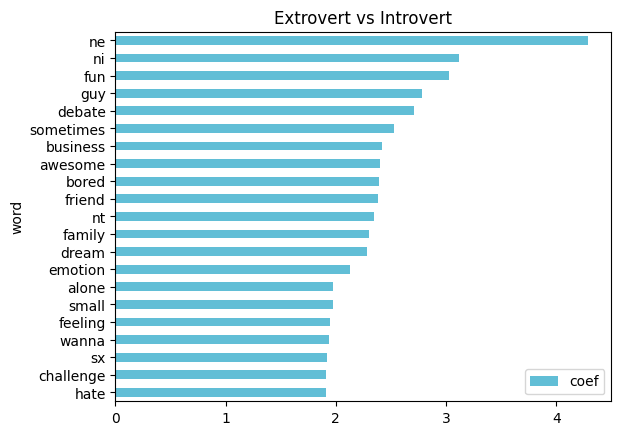

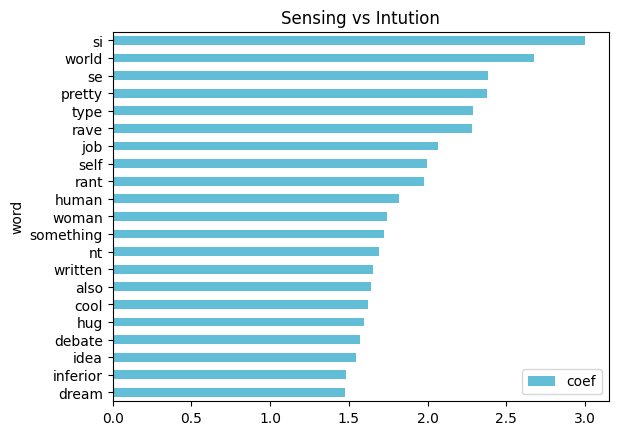

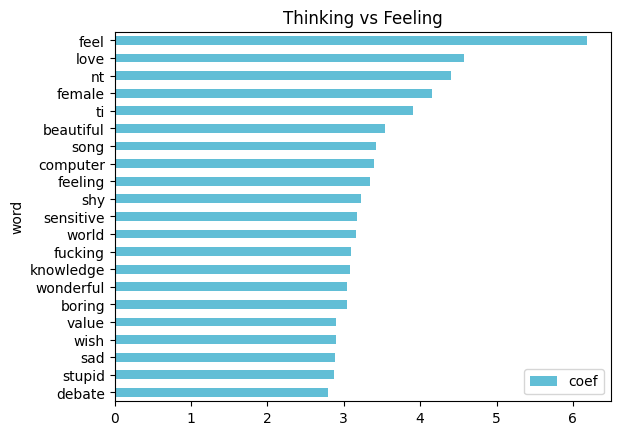

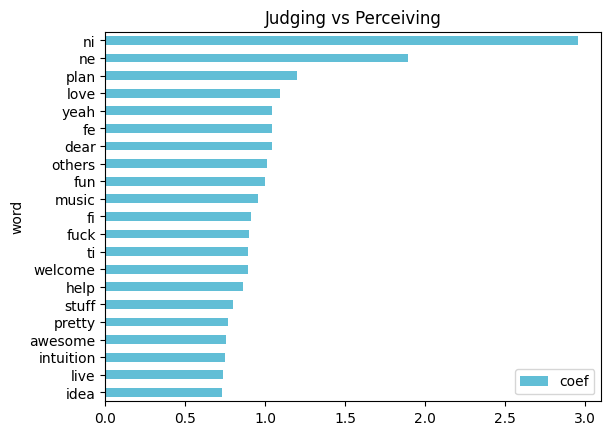

In [ ]:
%%time

for col in y.columns:

    print(f"\n{mbti_type[col]}")

    target = y[col]

    tfidf_logistic_regression = imb_make_pipeline(
        preprocessor_tf,
        RandomUnderSampler(),
        LogisticRegressionCV()
    )

    # training the data on entire dataset
    tfidf_logistic_regression.fit(X, target)

    # feature importance
    coef = tfidf_logistic_regression[-1].coef_[0]
    word = tfidf_logistic_regression[0].named_transformers_["tfidf"].get_feature_names_out()
    word_list = list(zip(word, coef))
    result = pd.DataFrame(word_list, columns=["word", "coef"]).set_index("word")
    result = result.reindex(result.coef.abs().sort_values(ascending=False).index)[0:21]
    print(result)

    # plotting feature importance
    result["coef"] = result["coef"].apply(lambda x: abs(x))
    result.sort_values("coef", inplace=True)
    result.plot(kind="barh", color="#61BED6", title=mbti_type[col])

    # saving the model
    dump(tfidf_logistic_regression, f"clf_{col}.joblib")

In [ ]:
import numpy as np
import pandas as pd
import os

# visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# feature engineering
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download("stopwords")

# sentiment scoring
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# pos tagging
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

# accuracy scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
)

# performance check
import time

# sparse to dense
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X, y=None, **fit_params):
        return X.todense()


# importing model
from joblib import load


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
path_to_csv = os.path.join("..", "content", "df_holdout.csv")
df = pd.read_csv(path_to_csv)

In [ ]:
df.head(2)

,type,posts
0,INTP,"'1. Yes, the Feminist movement combined with t..."
1,INFP,'Congrats! :)|||I have two younger sisters and...


In [ ]:

def categorize_types(personality_data):

    personality_data["is_extrovert"] = personality_data["type"].apply(
        lambda x: 1 if x[0] == "E" else 0
    )
    personality_data["is_sensing"] = personality_data["type"].apply(
        lambda x: 1 if x[1] == "S" else 0
    )
    personality_data["is_thinking"] = personality_data["type"].apply(
        lambda x: 1 if x[2] == "T" else 0
    )
    personality_data["is_judging"] = personality_data["type"].apply(
        lambda x: 1 if x[3] == "J" else 0
    )

    # rearranging the dataframe columns
    personality_data = personality_data[
        ["type", "is_extrovert", "is_sensing", "is_thinking", "is_judging", "posts"]
    ]



def clean_posts(personality_data):

    # converting posts into lower case
    personality_data["clean_posts"] = personality_data["posts"].str.lower()

    # replacing ||| with space
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        re.compile(r"\|\|\|"), " "
    )

    # replacing urls with domain name
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*"),
        ""
    )

    # dropping emails
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        re.compile(r"\S+@\S+"), ""
    )

    # dropping punctuations
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        re.compile(r"[^a-z\s]"), " "
    )

    # dropping MBTIs mentioned in the posts. There are quite a few mention of these types in these posts.
    mbti = personality_data["type"].unique()
    for type_word in mbti:
        personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
            type_word.lower(), ""
        )

    # removing words that are 1 to 2 characters long
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\b\w{1,2}\b"), ""
    )

    # lemmitizing
    lemmatizer = WordNetLemmatizer()

    personality_data["clean_posts"] = personality_data["clean_posts"].apply(
        lambda x: " ".join(
            [
                lemmatizer.lemmatize(word)
                for word in x.split(" ")
                if word not in stopwords.words("english")
            ]
        )
    )

    # tag_posts will be a list of 50 lists. need it for word stats (per post for each user)
    # replacing urls with domain name
    personality_data["tag_posts"] = personality_data["posts"].str.replace(
        re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*"),
        lambda match: match.group(2),
    )
    # replacing ||| with space
    personality_data["tag_posts"] = [
        post for post in personality_data["tag_posts"].str.split("\|\|\|")
    ]




def sentiment_score(personality_data):

    analyzer = SentimentIntensityAnalyzer()

    nlp_sentiment_score = []

    for post in personality_data["clean_posts"]:
        score = analyzer.polarity_scores(post)["compound"]
        nlp_sentiment_score.append(score)

    personality_data["compound_sentiment"] = nlp_sentiment_score




def pos_tagging(personality_data):

    personality_data["tagged_words"] = personality_data["tag_posts"].apply(
        lambda x: [nltk.pos_tag(word_tokenize(line)) for line in x]
    )

    # grouping pos tags based on stanford list
    tags_dict = {
        "ADJ": ["JJ", "JJR", "JJS"],
        "ADP": ["EX", "TO"],
        "ADV": ["RB", "RBR", "RBS", "WRB"],
        "CONJ": ["CC", "IN"],
        "DET": ["DT", "PDT", "WDT"],
        "NOUN": ["NN", "NNS", "NNP", "NNPS"],
        "NUM": ["CD"],
        "PRT": ["RP"],
        "PRON": ["PRP", "PRP$", "WP", "WP$"],
        "VERB": ["MD", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"],
        ".": ["#", "$", "''", "(", ")", ",", ".", ":"],
        "X": ["FW", "LS", "UH"],
    }

    def stanford_tag(x, tag):
        tags_list = [len([y for y in line if y[1] in tags_dict[col]]) for line in x]
        return tags_list

    for col in tags_dict.keys():
        personality_data[col + "_avg"] = personality_data["tagged_words"].apply(
            lambda x: np.mean(stanford_tag(x, col))
        )



def get_counts(personality_data):
    def unique_words(s):
        unique = set(s.split(" "))
        return len(unique)/50

    def emojis(post):

        emoji_count = 0
        words = post.split()
        for e in words:
            if "http" not in e:
                if e.count(":") == 2:
                    emoji_count += 1
        return emoji_count/50

    def colons(post):
        colon_count = 0
        words = post.split()
        for e in words:
            if "http" not in e:
                colon_count += e.count(":")
        return colon_count/50

    personality_data["qm"] = personality_data["posts"].apply(lambda s: s.count("?")/50)
    personality_data["em"] = personality_data["posts"].apply(lambda s: s.count("!")/50)
    personality_data["colons"] = personality_data["posts"].apply(colons)
    personality_data["emojis"] = personality_data["posts"].apply(emojis)

    personality_data["word_count"] = personality_data["posts"].apply(
        lambda s: (s.count(" ") + 1)/50
    )
    personality_data["unique_words"] = personality_data["posts"].apply(unique_words)

    personality_data["upper"] = personality_data["posts"].apply(
        lambda x: len([x for x in x.split() if x.isupper()])/50
    )
    personality_data["link_count"] = personality_data["posts"].apply(
        lambda s: s.count("http")/50
    )
    ellipses_count = [
        len(re.findall(r"\.\.\.\ ", posts))/50 for posts in personality_data["posts"]
    ]
    personality_data["ellipses"] = ellipses_count
    personality_data["img_count"] = [
        len(re.findall(r"(\.jpg)|(\.jpeg)|(\.gif)|(\.png)", post))/50
        for post in personality_data["posts"]
    ]


In [ ]:
def prep_data(personality_data):

    t = time.time()

    categorize_types(personality_data)

    clean_posts(personality_data)

    sentiment_score(personality_data)

    pos_tagging(personality_data)

    get_counts(personality_data)

    features = personality_data[
        [
            "clean_posts",
            "compound_sentiment",
            "ADJ_avg",
            "ADP_avg",
            "ADV_avg",
            "CONJ_avg",
            "DET_avg",
            "NOUN_avg",
            "NUM_avg",
            "PRT_avg",
            "PRON_avg",
            "VERB_avg",
            "qm",
            "em",
            "colons",
            "emojis",
            "word_count",
            "unique_words",
            "upper",
            "link_count",
            "ellipses",
            "img_count",
        ]
    ]

    X = features
    y = personality_data.iloc[:, :7]

    print(f"Total Preprocessing Time: {time.time()-t} seconds\n")

    return X, y


In [ ]:
def combine_classes(y_pred1, y_pred2, y_pred3, y_pred4):

    combined = []
    for i in range(len(y_pred1)):
        combined.append(
            str(y_pred1[i]) + str(y_pred2[i]) + str(y_pred3[i]) + str(y_pred4[i])
        )

    result = trace_back(combined)
    return result


def trace_back(combined):

    type_list = [
    {"0": "I", "1": "E"},
    {"0": "N", "1": "S"},
    {"0": "F", "1": "T"},
    {"0": "P", "1": "J"},
    ]

    result = []
    for num in combined:
        s = ""
        for i in range(len(num)):
            s += type_list[i][num[i]]
        result.append(s)

    return result


In [ ]:
def predict(path_to_csv):

    df = pd.read_csv(path_to_csv)

    X, y = prep_data(df)

    # loading the 4 models
    EorI_model = load(os.path.join("..", "content", "clf_is_extrovert.joblib"))
    SorN_model = load(os.path.join("..", "content", "clf_is_sensing.joblib"))
    TorF_model = load(os.path.join("..", "content", "clf_is_thinking.joblib"))
    JorP_model = load(os.path.join("..", "content", "clf_is_judging.joblib"))

    # predicting
    EorI_pred = EorI_model.predict(X)
    print(
        "Extrovert vs Introvert Accuracy: ",
        accuracy_score(y["is_extrovert"], EorI_pred),
    )
    print("y_true", y["is_extrovert"].values)
    print("preds", EorI_pred)

    SorN_pred = SorN_model.predict(X)
    print(
        "\nSensing vs Intuition Accuracy: ", accuracy_score(y["is_sensing"], SorN_pred)
    )
    print("y_true", y["is_sensing"].values)
    print("preds", SorN_pred)

    TorF_pred = TorF_model.predict(X)
    print(
        "\nThinking vs Feeling Accuracy: ", accuracy_score(y["is_thinking"], TorF_pred)
    )
    print("y_true", y["is_thinking"].values)
    print("preds", TorF_pred)

    JorP_pred = JorP_model.predict(X)
    print(
        "\nJudging vs Perceiving Accuracy: ", accuracy_score(y["is_judging"], JorP_pred)
    )
    print("y_true", y["is_judging"].values)
    print("preds", JorP_pred)

    # combining the predictions from the 4 models
    result = combine_classes(EorI_pred, SorN_pred, TorF_pred, JorP_pred)

    return result

In [ ]:
if __name__ == "__main__":

    predictions = predict(os.path.join("..", "content", "df_holdout.csv"))
    y_truth = pd.read_csv(os.path.join("..", "content", "df_holdout.csv"))["type"]

Total Preprocessing Time: 804.7034041881561 seconds

Extrovert vs Introvert Accuracy:  0.6044260027662517
y_true [0 0 0 ... 0 0 1]
preds [1 0 1 ... 0 1 1]

Sensing vs Intuition Accuracy:  0.49700322729368374
y_true [0 0 1 ... 0 0 0]
preds [0 1 1 ... 1 0 0]

Thinking vs Feeling Accuracy:  0.7090825265099124
y_true [1 0 0 ... 0 1 1]
preds [1 0 1 ... 0 1 1]

Judging vs Perceiving Accuracy:  0.6473029045643154
y_true [0 0 1 ... 0 1 0]
preds [1 0 0 ... 0 1 0]


In [ ]:
df['result']=predictions
df

,type,posts,result
0,INTP,"'1. Yes, the Feminist movement combined with t...",ENTJ
1,INFP,'Congrats! :)|||I have two younger sisters and...,ISFP
2,ISFJ,'Ill be twenty nine in two weeks.|||I wouldn't...,ESTP
3,ENTP,'Well...That all depends on the question: What...,ESTJ
4,INFP,"'No, I said its Fe thing to do would be to fol...",ESFJ
...,...,...,...
2164,INFJ,'Thank you. There's no way he's an INFP. Phil ...,ESTJ
2165,INFP,'MBTI Type- infp Enneagram/Socionics/other (o...,ISTP
2166,INFP,"'It's all about being humble, having no ego. B...",ISFP
2167,INTJ,"'Friend: So, you haven't been to the new offic...",ENTJ


In [ ]:
!curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null && echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list && sudo apt update && sudo apt install ngrok

deb https://ngrok-agent.s3.amazonaws.com buster main
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 https://ngrok-agent.s3.amazonaws.com buster InRelease [20.3 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [108 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [958 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://ngrok-agent.s3.amazonaws.com buster/main amd64 Packages [2,410 B]
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,081 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 http://secur

In [ ]:
!ngrok config add-authtoken 2T4NL6lQCTj3BiwuOed8U8c6VtY_X2SZDT5UirFiGFZANe8J

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
